 <h1><center>Dominio espacial</center></h1>

## Librerías

In [1]:
import numpy as np
import xarray as xr
import netCDF4 as nc

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

import pyproj

import warnings
warnings.simplefilter("ignore")


## Funciones

In [2]:
def example_figure_01(x1,y1,x2,y2):
    fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(9,7),subplot_kw={'projection': ccrs.PlateCarree()})
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',edgecolor='face', facecolor='gray',alpha=.2))
    ax.axis("off")
    ax.set_global()
    lon_grid = np.arange(-180,181,10)
    lat_grid = np.arange(-80,86,10)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, xlocs=lon_grid,ylocs=lat_grid,
                      linewidth=.01, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlabel_style = {'size': 0, 'color': 'black'}
    gl.ylabel_style = {'size': 0, 'color': 'black'}
    
    e = 3
    ax.set_extent([x1-e, x2+e, y1-e, y2+e])
    
    ax.plot((x1,x2,x2,x1,x1),(y1,y1,y2,y2,y1),'--r')
    ax.scatter(x1,y1,marker='*',s=100,c='r')
    ax.scatter(x2,y2,marker='*',s=100,c='r')
    ax.text(x1,y2+.5,f"WRF Domain",fontsize=16,fontweight='bold')
    
    ax.text(x1-2,y1+5.5,f"Distancia latitudinal",rotation=90,fontsize=16,fontweight='bold')
    ax.text(x1+11,y1-2,f"Distancia longitudinal",rotation=0,fontsize=16,fontweight='bold')
    
    ax.text(x1-2,y1-1.5,f"($x_{1}$,$y_{1}$)",fontsize=12)
    ax.text(x2-2,y2+1.5,f"($x_{2}$,$y_{2}$)",fontsize=12)
    plt.show()

def example_figure_02(x1,x2,y1,y2,i1,i2,j1,j2):
    fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(9,7),subplot_kw={'projection': ccrs.PlateCarree()})
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',edgecolor='face', facecolor='gray',alpha=.2))
    ax.axis("off")
    ax.set_global()
    lon_grid = np.arange(-180,181,10)
    lat_grid = np.arange(-80,86,10)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, xlocs=lon_grid,ylocs=lat_grid,
                      linewidth=.01, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlabel_style = {'size': 0, 'color': 'black'}
    gl.ylabel_style = {'size': 0, 'color': 'black'}
    
    e = 3
    ax.set_extent([x1-e, x2+e, y1-e, y2+e])
    ax.plot((x1,x2,x2,x1,x1),(y1,y1,y2,y2,y1),'--r')
    ax.plot((i1,i2,i2,i1,i1),(j1,j1,j2,j2,j1),'--g')
    ax.scatter(i1,j1,marker='*',s=100,c='g')
    ax.scatter(i2,j2,marker='*',s=100,c='g')
    ax.scatter(x1,y1,marker='*',s=100,c='r')
    ax.scatter(x2,y2,marker='*',s=100,c='r')
    ax.text(x1,y2+.5,f"WRF Domain",fontsize=16,fontweight='bold')
    ax.text(x1-2,y1+5.5,f"Distancia latitudinal",rotation=90,fontsize=16,fontweight='bold')
    ax.text(x1+11,y1-2,f"Distancia longitudinal",rotation=0,fontsize=16,fontweight='bold')
    ax.text(x1-2,y1-1.5,f"($x_{1}$,$y_{1}$)",fontsize=12)
    ax.text(x2-2,y2+1.5,f"($x_{2}$,$y_{2}$)",fontsize=12)
    ax.text(i1-2,j1-1.5,f"($i_{1}$,$j_{1}$)",fontsize=12)
    ax.text(i2-1.5,j2+1,f"($i_{2}$,$j_{2}$)",fontsize=12)
    ax.text(x2-3,y1+.5,f"D01",fontsize=14,fontweight='bold')
    ax.text(i2-3,j1+.5,f"D02",fontsize=14,fontweight='bold')
    
    plt.show()

def verification_figure01(ds):
    x1 = np.nanmin(ds.XLONG_M.values)
    x2 = np.nanmax(ds.XLONG_M.values)
    y1 = np.nanmin(ds.XLAT_M.values)
    y2 = np.nanmax(ds.XLAT_M.values)
    
    fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(9,7),subplot_kw={'projection': ccrs.PlateCarree()})
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',edgecolor='face', facecolor='gray',alpha=.2))
    ax.coastlines(color='w',linewidth=.5)
    ax.axis("off")
    ax.set_global()
    lon_grid = np.arange(-180,181,10)
    lat_grid = np.arange(-80,86,10)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, xlocs=lon_grid,ylocs=lat_grid,
                      linewidth=.01, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlabel_style = {'size': 0, 'color': 'black'}
    gl.ylabel_style = {'size': 0, 'color': 'black'}
    
    e = 3
    ax.set_extent([x1-e, x2+e, y1-e, y2+e])
    ax.plot((x1,x2,x2,x1,x1),(y1,y1,y2,y2,y1),'--r',linewidth=2)
    ax.text(x1,y2+.5,f"WRF Domain",fontsize=16,fontweight='bold')
    
    ax.contourf(ds.XLONG_M.values[0,:,:],ds.XLAT_M.values[0,:,:],ds.HGT_M.values[0,:,:],
               np.arange(-500,4000,10),cmap='terrain')
    
    plt.show()

def verification_figure02(ds_d01,ds_d02):
    x1 = np.nanmin(ds_d01.XLONG_M.values)
    x2 = np.nanmax(ds_d01.XLONG_M.values)
    y1 = np.nanmin(ds_d01.XLAT_M.values)
    y2 = np.nanmax(ds_d01.XLAT_M.values)
    
    i1 = np.nanmin(ds_d02.XLONG_M.values)
    i2 = np.nanmax(ds_d02.XLONG_M.values)
    j1 = np.nanmin(ds_d02.XLAT_M.values)
    j2 = np.nanmax(ds_d02.XLAT_M.values)
    
    fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(9,7),subplot_kw={'projection': ccrs.PlateCarree()})
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',edgecolor='face', facecolor='gray',alpha=.2))
    ax.coastlines(color='w',linewidth=.5)
    ax.axis("off")
    ax.set_global()
    lon_grid = np.arange(-180,181,10)
    lat_grid = np.arange(-80,86,10)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, xlocs=lon_grid,ylocs=lat_grid,
                      linewidth=.01, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlabel_style = {'size': 0, 'color': 'black'}
    gl.ylabel_style = {'size': 0, 'color': 'black'}
    
    e = 3
    ax.set_extent([x1-e, x2+e, y1-e, y2+e])
    ax.plot((x1,x2,x2,x1,x1),(y1,y1,y2,y2,y1),'--r',linewidth=2)
    
    ax.plot((i1,i2,i2,i1,i1),(j1,j1,j2,j2,j1),'--r',linewidth=2)
    
    ax.text(x1,y2+.5,f"WRF Domain",fontsize=16,fontweight='bold')
    
    ax.contourf(ds_d01.XLONG_M.values[0,:,:],ds_d01.XLAT_M.values[0,:,:],ds_d01.HGT_M.values[0,:,:],
               np.arange(-500,4000,10),cmap='terrain')
    
    plt.show()

## Parámetros del dominio 

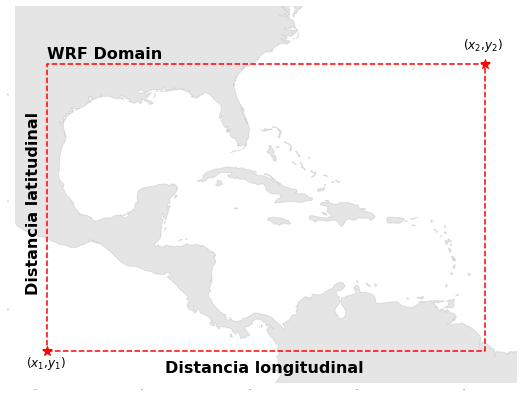

In [3]:
example_figure_01(x1=-98.89981,y1=6.0791016,x2=-58.10019,y2=32.79454)

### Parámetros namelist.wps 

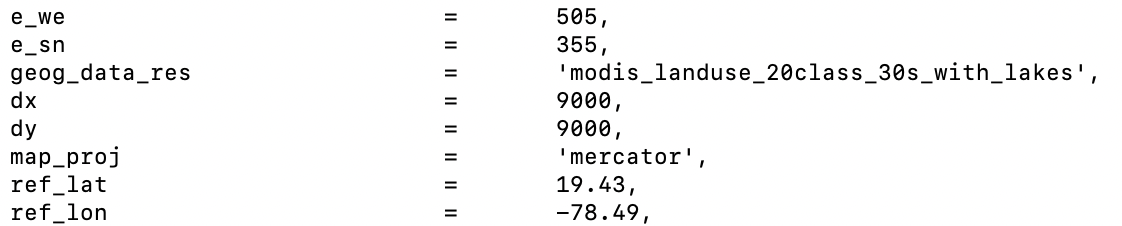

In [4]:
def get_params_mercator_d01(x1,y1,x2,y2,dx):
    inProj = pyproj.Proj(init='epsg:4326') # WGS84
    outProj = pyproj.Proj(init='epsg:3857') # Mercator
    x11, y11 = pyproj.transform(inProj, outProj, x1, y1)
    x22, y22 = pyproj.transform(inProj, outProj, x2, y2)
    distx = np.sqrt((x22-x11)**2+(y11-y11)**2)
    disty = np.sqrt((x11-x11)**2+(y22-y11)**2)
    ncols = int(np.ceil(distx/dx))
    nrows = int(np.ceil(disty/dx))
    lonm = np.round(np.abs(x1 - x2)/2,2) + x1
    latm = np.round(np.abs(y1 - y2)/2,2) + y1
    return ncols, nrows, latm, lonm

In [5]:
e_we, e_sn, ref_lat, ref_lon = get_params_mercator_d01(
    x1=-79.458258,
    y1=1.222933,
    x2=-70.021575,
    y2=7.555812,
    dx=9000
)

print (
    f"Parámetros recomendados \n"
    f"\n"
    f"Número de columnas ó e_we = {e_we} \n"
    f"Número de filas ó e_sn = {e_sn} \n"
    f"Latitude central ó ref_lat = {ref_lat} \n"
    f"Longitud central ó ref_lon = {ref_lon} \n"
      )

Parámetros recomendados 

Número de columnas ó e_we = 117 
Número de filas ó e_sn = 79 
Latitude central ó ref_lat = 4.392933 
Longitud central ó ref_lon = -74.738258 



### Verificar parámetros

In [8]:
ds_geo = xr.open_dataset('geo_em.d01_domain1.nc',engine='netcdf4')

In [9]:
print(
    f"Después de Ejecutar geogrid.exe \n"
    f"\n"
    f"x1 {np.nanmin(ds_geo.XLONG_M.values)} \n"
    f"x2 {np.nanmax(ds_geo.XLONG_M.values)} \n"
    f"y1 {np.nanmin(ds_geo.XLAT_M.values)} \n"
    f"y2 {np.nanmax(ds_geo.XLAT_M.values)} \n"
     )

Después de Ejecutar geogrid.exe 

x1 -98.84933471679688 
x2 -58.13066101074219 
y1 5.516975402832031 
y2 32.2498779296875 



In [ ]:
verification_figure01(ds=ds_geo)

## Anidamiento ó Nesting

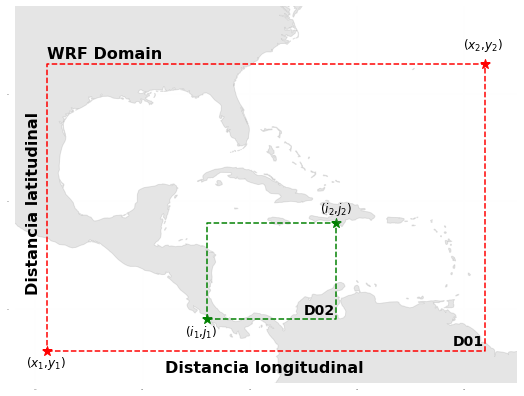

In [10]:
example_figure_02(x1=-98.89981,x2=-58.100185,y1=6.0791016,y2=32.79454,i1=-84,i2=-72,j1=9,j2=18)

### namelis.wps 

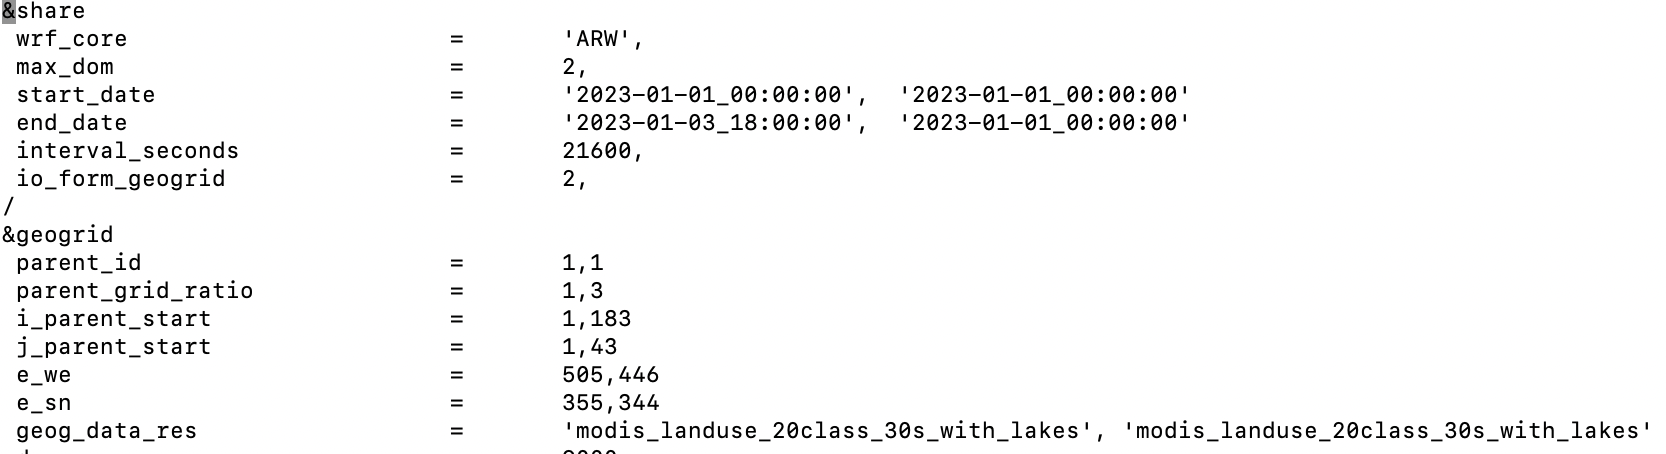

In [11]:
def get_params_mercator_d02(i1,i2,j1,j2,dx,ds):
    lon_parent = ds.XLONG_M.values[0,0,:]
    lat_parent = ds.XLAT_M.values[0,:,0]
    pos_lon = np.where(np.abs(lon_parent - i1) == np.min(np.abs(lon_parent - i1)))[0][0]
    pos_lat = np.where(np.abs(lat_parent - j1) == np.min(np.abs(lat_parent - j1)))[0][0]
    
    inProj = pyproj.Proj(init='epsg:4326') # WGS84
    outProj = pyproj.Proj(init='epsg:3857') # Mercator
    i11, j11 = pyproj.transform(inProj, outProj, i1, j1)
    i22, j22 = pyproj.transform(inProj, outProj, i2, j2)
    distx = np.sqrt((i22-i11)**2+(j11-j11)**2)
    disty = np.sqrt((i11-i11)**2+(j22-j11)**2)
    ncols = int(np.ceil(distx/dx))
    nrows = int(np.ceil(disty/dx))
    
    if np.mod(ncols-1,(dx/1000)) != 0: 
        ncols = ncols - 1
        print('Corrected e_we')
    
    if np.mod(nrows-1,(dx/1000)) != 0: 
        nrows = nrows - 1
        print('Corrected s_sn')

    return ncols, nrows, pos_lat, pos_lon

In [12]:
ds_geo_d01 = xr.open_dataset('geo_em.d01_domain2.nc',engine='netcdf4')
e_we, e_sn, j_start, i_start = get_params_mercator_d02(
    i1=-84,
    i2=-72,
    j1=9,
    j2=18,
    dx=3000,
    ds=ds_geo_d01
)

Corrected e_we
Corrected s_sn


In [15]:
print (
    f"Parámetros recomendados \n"
    f"\n"
    f"Número de columnas ó e_we = {e_we} \n"
    f"Número de filas ó e_sn = {e_sn} \n"
    f"j_parent_start = {j_start} \n"
    f"i_parent_start = {i_start} \n"
      )

Parámetros recomendados 

Número de columnas ó e_we = 445 
Número de filas ó e_sn = 343 
j_parent_start = 43 
i_parent_start = 183 



### Verificar parámetros

In [ ]:
ds_geo_d01 = xr.open_dataset('geo_em.d01_domain2.nc',engine='netcdf4')
ds_geo_d02 = xr.open_dataset('geo_em.d02_domain2.nc',engine='netcdf4')

In [ ]:
print(
    f"Después de Ejecutar geogrid.exe \n"
    f"\n"
    f"x1 {np.nanmin(ds_geo_d02.XLONG_M.values)} \n"
    f"x2 {np.nanmax(ds_geo_d02.XLONG_M.values)} \n"
    f"y1 {np.nanmin(ds_geo_d02.XLAT_M.values)} \n"
    f"y2 {np.nanmax(ds_geo_d02.XLAT_M.values)} \n"
     )

In [ ]:
verification_figure02(ds_d01=ds_geo_d01,ds_d02=ds_geo_d02)

In [ ]:
ds_geo_d01 = xr.open_dataset('geo_em.d03_synapsis.nc',engine='netcdf4')

xmin = np.nanmin(ds_geo_d01.XLONG_M.values)
xmax = np.nanmax(ds_geo_d01.XLONG_M.values)
ymin = np.nanmin(ds_geo_d01.XLAT_M.values)
ymax = np.nanmax(ds_geo_d01.XLAT_M.values)

hgt = ds_geo_d01.HGT_M.values[0,:,:]
alb = ds_geo_d01.ALBEDO12M.values[0,0,:,:]
soil = ds_geo_d01.SCT_DOM.values[0,:,:]
lai = ds_geo_d01.LAI12M.values[0,0,:,:]
lat = ds_geo_d01.XLAT_M.values[0,:,:]
lon = ds_geo_d01.XLONG_M.values[0,:,:]

In [ ]:
fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(11,10),
                      subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_axis_off()
ax.set_global()
ax.coastlines(lw=.01)
lon_grid = np.arange(-180,181,20)
lat_grid = np.arange(-80,86,10)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, xlocs=lon_grid,ylocs=lat_grid,
                  linewidth=.01, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabel_style = {'size': 16, 'color': 'black'}
gl.ylabel_style = {'size': 16, 'color': 'black'}
ax.set_extent([xmin, xmax, ymin, ymax])

mapa = ax.contourf(lon,lat,hgt,np.arange(-100,4500,50),cmap='terrain',extend='both')
#csmp = ax.contour(lon,lat,hgt,[1000,2000,3000,4000],colors='k')
#ax.clabel(csmp,inline=True,fmt='%2.1f',fontsize=10)
plt.text(xmin,ymax+.05,f'SYNAPSIS HGT',fontsize=20,fontweight='bold')

cbar_ax = fig.add_axes([0.9, 0.125, 0.03, 0.76])
cbar1 = plt.colorbar(mapa,cax=cbar_ax,orientation='vertical',ticks=[0,500,1000,1500,2000,2500,3000,3500,4000,4500])
cbar1.set_label(r'HGT $[m]$',fontsize=24)
cbar1.ax.tick_params(labelsize=14)

#name_out = 'sst_'+(ruta_data+file_name1).split('/')[-1].split('_')[2]+'_'\
#           +(ruta_data+file_name1).split('/')[-1].split('_')[3][0:2]
plt.savefig('hgt_synapsis.png',dpi=200,bbox_inches="tight")
plt.show()

In [ ]:
fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(11,10),
                      subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_axis_off()
ax.set_global()
ax.coastlines(lw=.01)
lon_grid = np.arange(-180,181,20)
lat_grid = np.arange(-80,86,10)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, xlocs=lon_grid,ylocs=lat_grid,
                  linewidth=.01, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabel_style = {'size': 16, 'color': 'black'}
gl.ylabel_style = {'size': 16, 'color': 'black'}
ax.set_extent([xmin, xmax, ymin, ymax])

mapa = ax.contourf(lon,lat,alb,np.arange(0,25,1),cmap='Purples_r',extend='both')
#csmp = ax.contour(lon,lat,alb,[5,10,15,20],colors='k')
#ax.clabel(csmp,inline=True,fmt='%2.1f',fontsize=10)
plt.text(xmin,ymax+.05,f'ALBEDO JANUARY',fontsize=20,fontweight='bold')

cbar_ax = fig.add_axes([0.9, 0.125, 0.03, 0.76])
cbar1 = plt.colorbar(mapa,cax=cbar_ax,orientation='vertical',ticks=[0,5,10,15,20])
cbar1.set_label(r'Albedo $[\%]$',fontsize=24)
cbar1.ax.tick_params(labelsize=14)

#name_out = 'sst_'+(ruta_data+file_name1).split('/')[-1].split('_')[2]+'_'\
#           +(ruta_data+file_name1).split('/')[-1].split('_')[3][0:2]
plt.savefig('alb_synapsis.png',dpi=200,bbox_inches="tight")
plt.show()

In [ ]:
fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(11,10),
                      subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_axis_off()
ax.set_global()
ax.coastlines(lw=.01)
lon_grid = np.arange(-180,181,20)
lat_grid = np.arange(-80,86,10)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, xlocs=lon_grid,ylocs=lat_grid,
                  linewidth=.01, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabel_style = {'size': 16, 'color': 'black'}
gl.ylabel_style = {'size': 16, 'color': 'black'}
ax.set_extent([xmin, xmax, ymin, ymax])

mapa = ax.contourf(lon,lat,lai,np.arange(0,10,.25),cmap='Greens',extend='both')
#csmp = ax.contour(lon,lat,alb,[5,10,15,20],colors='k')
#ax.clabel(csmp,inline=True,fmt='%2.1f',fontsize=10)
plt.text(xmin,ymax+.05,f'LEAF AREA INDEX JANUARY',fontsize=20,fontweight='bold')

cbar_ax = fig.add_axes([0.9, 0.125, 0.03, 0.76])
cbar1 = plt.colorbar(mapa,cax=cbar_ax,orientation='vertical',ticks=[0,2,4,6,8,10])
cbar1.set_label(r'LAI $[m^{2}/m^{2}]$',fontsize=24)
cbar1.ax.tick_params(labelsize=14)

#name_out = 'sst_'+(ruta_data+file_name1).split('/')[-1].split('_')[2]+'_'\
#           +(ruta_data+file_name1).split('/')[-1].split('_')[3][0:2]
plt.savefig('lai_synapsis.png',dpi=200,bbox_inches="tight")
plt.show()

In [ ]:
fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(11,10),
                      subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_axis_off()
ax.set_global()
ax.coastlines(lw=.01)
lon_grid = np.arange(-180,181,20)
lat_grid = np.arange(-80,86,10)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, xlocs=lon_grid,ylocs=lat_grid,
                  linewidth=.01, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabel_style = {'size': 16, 'color': 'black'}
gl.ylabel_style = {'size': 16, 'color': 'black'}
ax.set_extent([xmin, xmax, ymin, ymax])

mapa = ax.pcolormesh(lon,lat,soil,cmap='Greens')
#csmp = ax.contour(lon,lat,alb,[5,10,15,20],colors='k')
#ax.clabel(csmp,inline=True,fmt='%2.1f',fontsize=10)
plt.text(xmin,ymax+.05,f'LEAF AREA INDEX JANUARY',fontsize=20,fontweight='bold')

cbar_ax = fig.add_axes([0.9, 0.125, 0.03, 0.76])
cbar1 = plt.colorbar(mapa,cax=cbar_ax,orientation='vertical',ticks=[0,2,4,6,8,10])
cbar1.set_label(r'LAI $[m^{2}/m^{2}]$',fontsize=24)
cbar1.ax.tick_params(labelsize=14)

#name_out = 'sst_'+(ruta_data+file_name1).split('/')[-1].split('_')[2]+'_'\
#           +(ruta_data+file_name1).split('/')[-1].split('_')[3][0:2]
#plt.savefig('lai_synapsis.png',dpi=200,bbox_inches="tight")
plt.show()

In [ ]:
np.unique(soil)